# Анализ графов

In [1]:
import json
import requests
import networkx as nx
from networkx.readwrite import json_graph
from networkx.algorithms import community
from collections import Counter
import numpy as np
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]

# Данные

Данные из эпизодов Star Wars

http://evelinag.com/blog/2015/12-15-star-wars-social-network/

In [2]:
interactions = json.loads(requests.get('https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/networks/starwars-full-interactions.json').content)

In [3]:
interactions

{'nodes': [{'name': 'QUI-GON', 'value': 61, 'colour': '#4f4fb1'},
  {'name': 'NUTE GUNRAY', 'value': 24, 'colour': '#808080'},
  {'name': 'PK-4', 'value': 3, 'colour': '#808080'},
  {'name': 'TC-14', 'value': 4, 'colour': '#808080'},
  {'name': 'OBI-WAN', 'value': 147, 'colour': '#48D1CC'},
  {'name': 'DOFINE', 'value': 3, 'colour': '#808080'},
  {'name': 'RUNE', 'value': 10, 'colour': '#808080'},
  {'name': 'TEY HOW', 'value': 4, 'colour': '#808080'},
  {'name': 'EMPEROR', 'value': 51, 'colour': '#191970'},
  {'name': 'CAPTAIN PANAKA', 'value': 19, 'colour': '#808080'},
  {'name': 'SIO BIBBLE', 'value': 8, 'colour': '#808080'},
  {'name': 'JAR JAR', 'value': 41, 'colour': '#9a9a00'},
  {'name': 'TARPALS', 'value': 3, 'colour': '#808080'},
  {'name': 'BOSS NASS', 'value': 4, 'colour': '#808080'},
  {'name': 'PADME', 'value': 74, 'colour': '#DDA0DD'},
  {'name': 'RIC OLIE', 'value': 11, 'colour': '#808080'},
  {'name': 'WATTO', 'value': 8, 'colour': '#808080'},
  {'name': 'ANAKIN', 'val

In [4]:
interactions['directed'] = True
interactions['multigraph'] = False
interactions['graph'] = {}

In [5]:
G = json_graph.node_link_graph(interactions)

In [6]:
G

In [7]:
G.number_of_nodes()

110

In [8]:
G.number_of_edges()

398

In [9]:
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['value']
        print(f'({n}, {nbr}, {wt:.3f} )')
        break
    break

(0, 3, 1.000 )


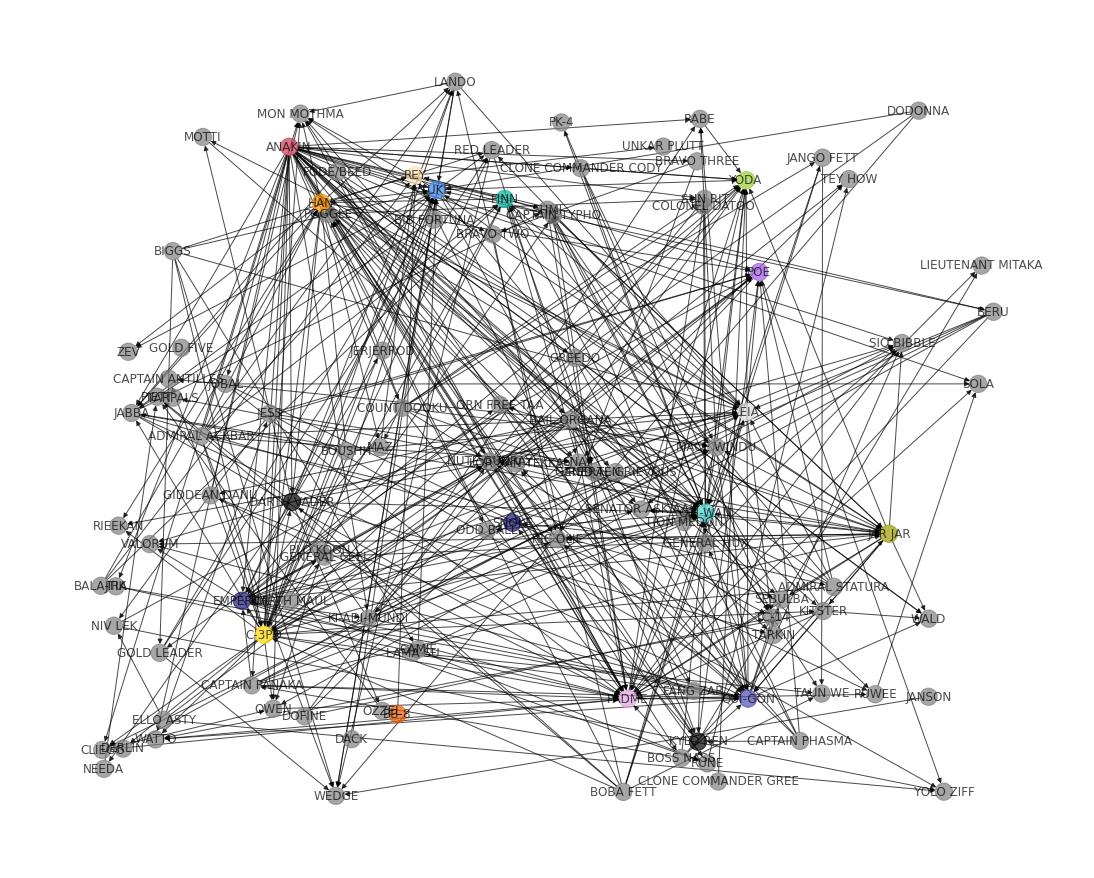

In [10]:
clrs = np.array([n[1]['colour'] for n in G.nodes.data()])
nx.draw_random(G, node_color=clrs, with_labels=True, alpha=.7, labels={n[0]: n[1]['name'] for n in G.nodes.data()})

In [11]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_counts = Counter(betweenness_centrality)
for k, v in betweenness_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

OBI-WAN 0.03769851382618966
C-3PO 0.026208207260704715
PADME 0.021777529677631618
LUKE 0.01929882044560944
HAN 0.01892397348564525
QUI-GON 0.016035797884676573
EMPEROR 0.014146090534979422
LEIA 0.010008245284748855
JAR JAR 0.009814484464076718
JABBA 0.007007548177272949


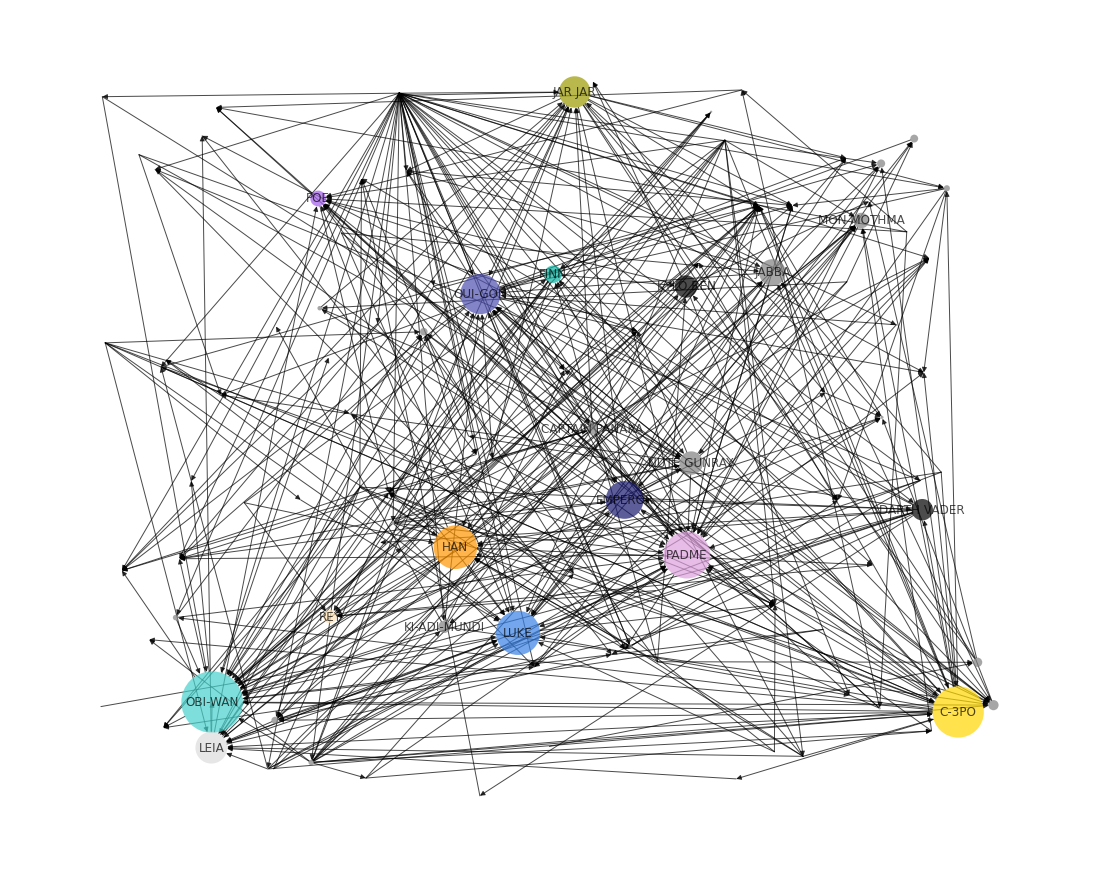

In [12]:
th = betweenness_centrality_counts.most_common(20)[-1][1]
nx.draw_random(
    G,
    node_color=clrs,
    with_labels=True,
    alpha=.7,
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if betweenness_centrality[n[0]] > th},
    node_size=np.array(list(betweenness_centrality.values())) * 100000,
    linewidths=.1,
)

In [13]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_counts = Counter(degree_centrality)
for k, v in degree_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

ANAKIN 0.3761467889908257
OBI-WAN 0.3211009174311927
PADME 0.30275229357798167
C-3PO 0.30275229357798167
QUI-GON 0.23853211009174313
JAR JAR 0.22018348623853212
LUKE 0.22018348623853212
HAN 0.21100917431192662
EMPEROR 0.2018348623853211
LEIA 0.1926605504587156


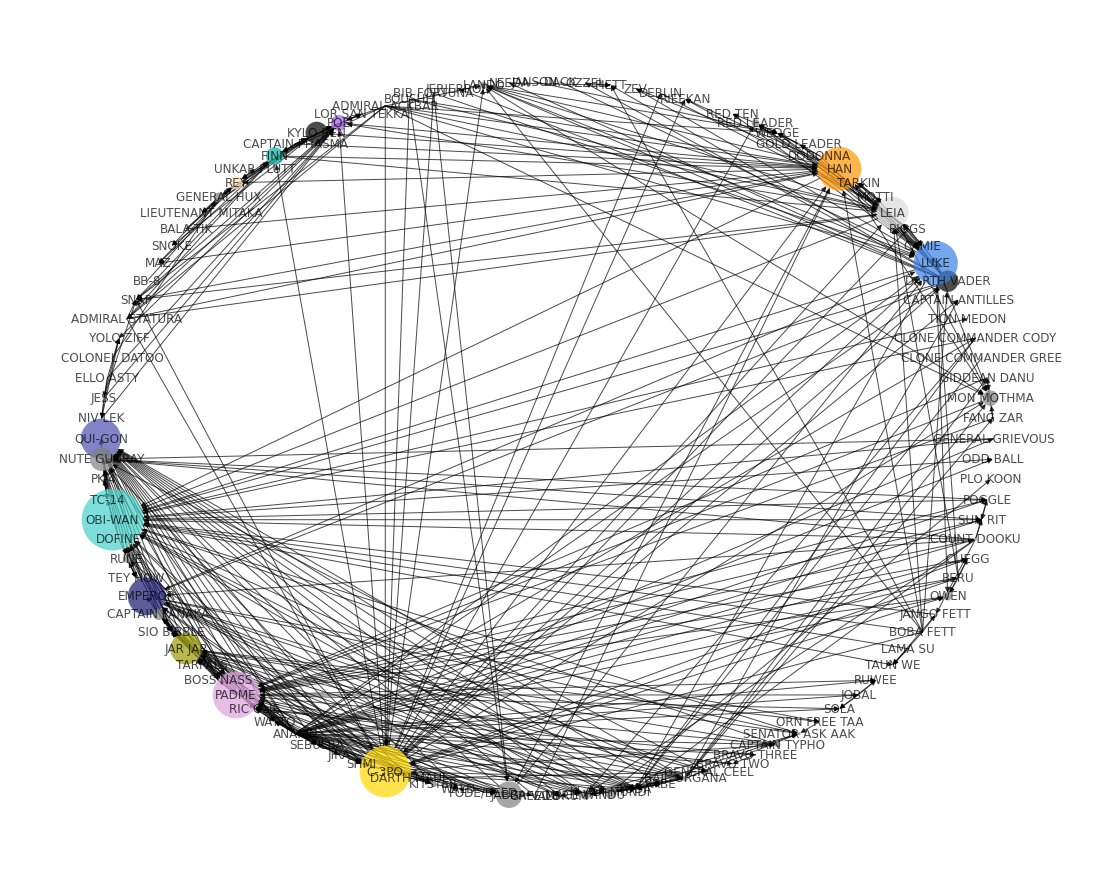

In [14]:
 nx.draw_shell(
    G,
    node_color=clrs,
    with_labels=True,
    alpha=.7,
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if degree_centrality[n[0]] > th},
    node_size=np.array(list(betweenness_centrality.values())) * 100000,
    linewidths=.1,
 )

# Closeness centrality
Центральность по близости, выражает, насколько близко узел расположен к остальным узлам

In [16]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality_counts = Counter(closeness_centrality)
for k, v in closeness_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

YODA 0.2893916451411775
PADME 0.271163469557965
OBI-WAN 0.25688073394495414
QUI-GON 0.25574576752104416
SHMI 0.23466924191211974
SIO BIBBLE 0.23009501965923984
SUN RIT 0.22409254088552055
RIC OLIE 0.2202562982379496
POGGLE 0.21760824078544985
TC-14 0.21401834862385322


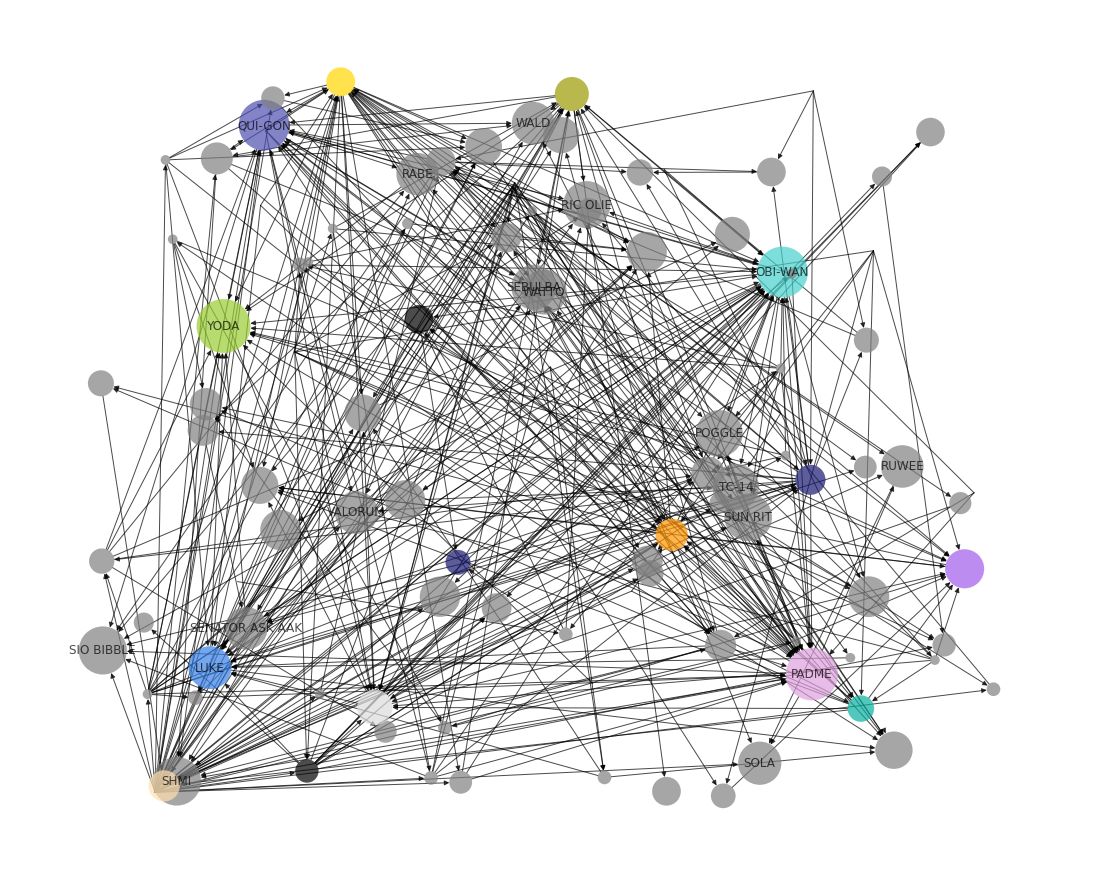

In [23]:
th = closeness_centrality_counts.most_common(20)[-1][1]
nx.draw_random(
    G,
    node_color=clrs,
    with_labels=True,
    alpha=.7,
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if closeness_centrality[n[0]] > th},
    node_size=np.array(list(closeness_centrality.values())) * 10000,
    linewidths=.1,
)

# Community detection

In [24]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))
for c in communities:
    print('Community: ', ', '.join([G.nodes[n]['name'] for n in c]))
                     

Community:  QUI-GON, NUTE GUNRAY, PK-4, TC-14, OBI-WAN, DOFINE, RUNE, TEY HOW, EMPEROR, CAPTAIN PANAKA, SIO BIBBLE, JAR JAR, TARPALS, BOSS NASS, PADME, RIC OLIE, WATTO, ANAKIN, SEBULBA, JIRA, SHMI, DARTH MAUL, KITSTER, WALD, FODE/BEED, JABBA, GREEDO, VALORUM, MACE WINDU, KI-ADI-MUNDI, YODA, RABE, BAIL ORGANA, GENERAL CEEL, BRAVO TWO, BRAVO THREE, CAPTAIN TYPHO, SENATOR ASK AAK, ORN FREE TAA, SOLA, JOBAL, RUWEE, TAUN WE, LAMA SU, JANGO FETT, OWEN, CLIEGG, COUNT DOOKU, SUN RIT, POGGLE, PLO KOON, ODD BALL, GENERAL GRIEVOUS, FANG ZAR, GIDDEAN DANU, CLONE COMMANDER GREE, CLONE COMMANDER CODY, TION MEDON
Community:  C-3PO, BOBA FETT, BERU, MON MOTHMA, CAPTAIN ANTILLES, DARTH VADER, LUKE, CAMIE, BIGGS, LEIA, MOTTI, TARKIN, HAN, DODONNA, GOLD LEADER, WEDGE, RED LEADER, RED TEN, RIEEKAN, DERLIN, ZEV, PIETT, OZZEL, DACK, JANSON, NEEDA, LANDO, JERJERROD, BIB FORTUNA, BOUSHH, ADMIRAL ACKBAR, FINN, UNKAR PLUTT, REY, BALA-TIK, MAZ, BB-8, SNAP, ADMIRAL STATURA
Community:  GOLD FIVE
Community:  LOR SA

In [25]:
from networkx import edge_betweenness_centrality as betweenness

def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)

comp = community.girvan_newman(G, most_valuable_edge=most_central_edge)
communities = tuple(sorted(c) for c in next(comp))
for c in communities:
    print('Community: ', ', '.join([G.nodes[n]['name'] for n in c]))

Community:  QUI-GON, NUTE GUNRAY, PK-4, TC-14, OBI-WAN, DOFINE, RUNE, TEY HOW, EMPEROR, CAPTAIN PANAKA, SIO BIBBLE, JAR JAR, TARPALS, BOSS NASS, PADME, RIC OLIE, WATTO, ANAKIN, SEBULBA, JIRA, SHMI, C-3PO, DARTH MAUL, KITSTER, WALD, FODE/BEED, JABBA, GREEDO, VALORUM, MACE WINDU, KI-ADI-MUNDI, YODA, RABE, BAIL ORGANA, GENERAL CEEL, BRAVO TWO, BRAVO THREE, CAPTAIN TYPHO, SENATOR ASK AAK, ORN FREE TAA, SOLA, JOBAL, RUWEE, TAUN WE, LAMA SU, BOBA FETT, JANGO FETT, OWEN, BERU, CLIEGG, COUNT DOOKU, SUN RIT, POGGLE, PLO KOON, ODD BALL, GENERAL GRIEVOUS, FANG ZAR, MON MOTHMA, GIDDEAN DANU, CLONE COMMANDER GREE, CLONE COMMANDER CODY, TION MEDON, CAPTAIN ANTILLES, DARTH VADER, LUKE, CAMIE, BIGGS, LEIA, MOTTI, TARKIN, HAN, DODONNA, GOLD LEADER, WEDGE, RED LEADER, RED TEN, RIEEKAN, DERLIN, ZEV, PIETT, OZZEL, DACK, JANSON, NEEDA, LANDO, JERJERROD, BIB FORTUNA, BOUSHH, ADMIRAL ACKBAR, FINN, UNKAR PLUTT, REY, BALA-TIK, MAZ, BB-8, SNAP, ADMIRAL STATURA
Community:  GOLD FIVE
Community:  LOR SAN TEKKA, PO

https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.clique.html

In [26]:
for c in nx.find_cliques(G.to_undirected()):
    print(c, ', '.join([G.nodes[n]['name'] for n in c]))

[2, 3, 4] PK-4, TC-14, OBI-WAN
[3, 1, 0, 4] TC-14, NUTE GUNRAY, QUI-GON, OBI-WAN
[3, 1, 5] TC-14, NUTE GUNRAY, DOFINE
[5, 1, 7] DOFINE, NUTE GUNRAY, TEY HOW
[6, 1, 8, 22] RUNE, NUTE GUNRAY, EMPEROR, DARTH MAUL
[6, 1, 7] RUNE, NUTE GUNRAY, TEY HOW
[12, 11] TARPALS, JAR JAR
[17, 32, 0, 29, 30, 31] ANAKIN, RABE, QUI-GON, MACE WINDU, KI-ADI-MUNDI, YODA
[17, 64, 21, 48, 47] ANAKIN, LUKE, C-3PO, BERU, OWEN
[17, 64, 21, 26] ANAKIN, LUKE, C-3PO, JABBA
[17, 64, 21, 4, 8, 63] ANAKIN, LUKE, C-3PO, OBI-WAN, EMPEROR, DARTH VADER
[17, 64, 21, 4, 8, 31] ANAKIN, LUKE, C-3PO, OBI-WAN, EMPEROR, YODA
[17, 35, 36, 15] ANAKIN, BRAVO TWO, BRAVO THREE, RIC OLIE
[17, 14, 0, 1, 8, 10, 4] ANAKIN, PADME, QUI-GON, NUTE GUNRAY, EMPEROR, SIO BIBBLE, OBI-WAN
[17, 14, 0, 11, 18, 26, 20] ANAKIN, PADME, QUI-GON, JAR JAR, SEBULBA, JABBA, SHMI
[17, 14, 0, 11, 4, 8, 33, 29, 31] ANAKIN, PADME, QUI-GON, JAR JAR, OBI-WAN, EMPEROR, BAIL ORGANA, MACE WINDU, YODA
[17, 14, 0, 11, 4, 8, 10, 9] ANAKIN, PADME, QUI-GON, JAR JAR, OBI

## Статьи
1. Алгоритмы выделения сообществ. http://www.machinelearning.ru/wiki/images/8/8a/Nikishin_coursework_community_detection.pdf
2. Пример анализа зависимостей пакетов в pip. http://kgullikson88.github.io/blog/pypi-analysis.html
3. Книга Network science http://barabasi.com/networksciencebook/
4. Подборка материалов https://github.com/briatte/awesome-network-analysis
5. Конкурс по кейсу https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network#evaluation
